In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

- Generate Data

In [2]:
xtrain = np.linspace(-1, 1, 20)
xtrain

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [3]:
ytrain = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
xtest = np.linspace(-1, 1, 20)

In [5]:
ytest = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

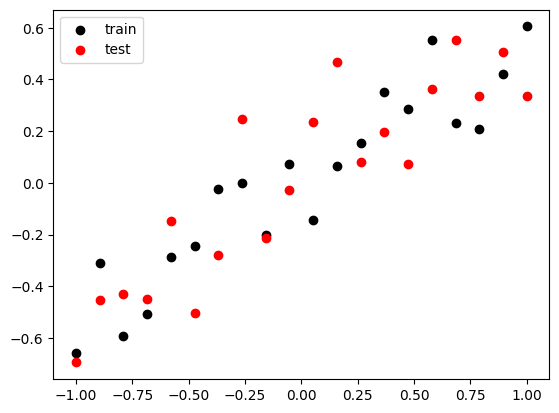

In [6]:
plt.scatter(xtrain, ytrain, c='black', label='train')
plt.scatter(xtest, ytest, c='red', label='test')
plt.legend()
plt.show()

- Regression Model

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(xtrain, ytrain, epochs=500, 
                    validation_data = (xtest, ytest),
                    verbose=False)

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(xtrain, ytrain, verbose=0)
_, test_mse = model_1.evaluate(xtest, ytest, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004691914189606905, Test: 0.04559699818491936


In [11]:
y_pred_1 = model_1.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


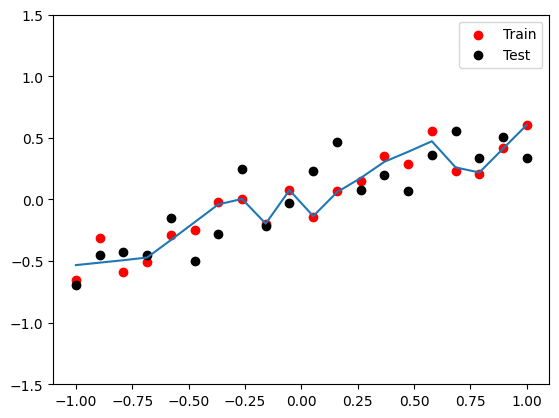

In [21]:
plt.figure()
plt.scatter(xtrain, ytrain, c='red', label='Train')
plt.scatter(xtest, ytest, c='black', label='Test')
plt.plot(xtest, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

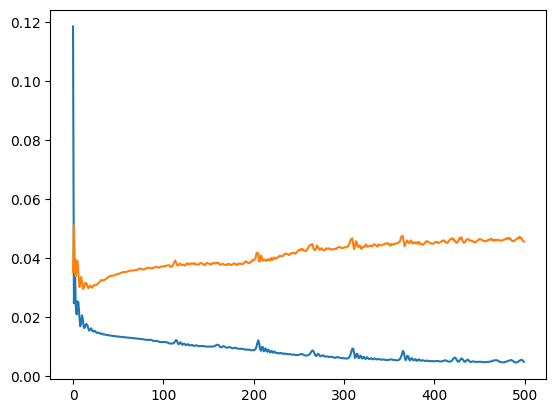

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

- Dropout Model

In [35]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(xtrain, ytrain, epochs=500, 
                               validation_data = (xtest, ytest),
                               verbose=False)

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# evaluate the model
_, train_mse = model_2.evaluate(xtrain, ytrain, verbose=0)
_, test_mse = model_2.evaluate(xtest, ytest, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013117240741848946, Test: 0.035617053508758545


In [37]:
y_pred_2 = model_2.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


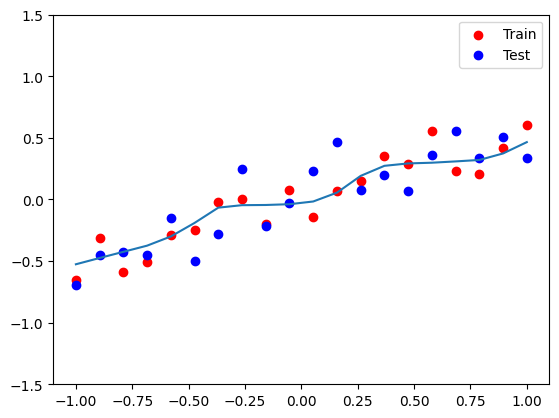

In [38]:
plt.figure()
plt.scatter(xtrain, ytrain, c='red', label='Train')
plt.scatter(xtest, ytest, c='blue', label='Test')
plt.plot(xtest, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

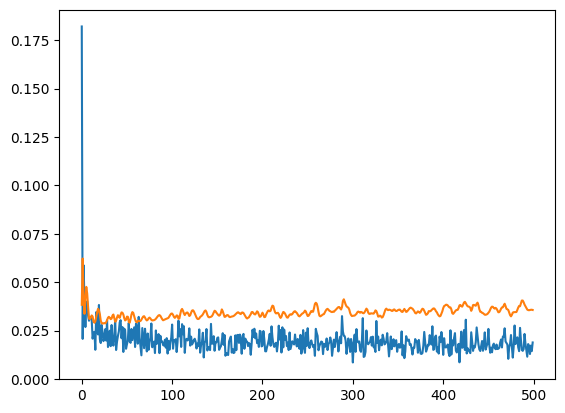

In [39]:
plt.plot(drop_out_history.history['loss'])
plt.plot(drop_out_history.history['val_loss'])